In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


# Load CIFAR10 Dataset

In [3]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize image pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Define CNN Model

In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

# Train the model

In [5]:
history_no_aug = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_test, y_test),
    shuffle=True
)

model.save("cnn_cifar10_no_augmentation.h5")
print("Model saved successfully!")


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.3340 - loss: 1.7992 - val_accuracy: 0.5982 - val_loss: 1.1421
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5797 - loss: 1.1755 - val_accuracy: 0.6546 - val_loss: 0.9554
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6556 - loss: 0.9767 - val_accuracy: 0.7139 - val_loss: 0.8320
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6969 - loss: 0.8577 - val_accuracy: 0.7273 - val_loss: 0.7652
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7336 - loss: 0.7603 - val_accuracy: 0.7413 - val_loss: 0.7339
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7490 - loss: 0.7058 - val_accuracy: 0.7573 - val_loss: 0.6949
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7704 - loss: 0.6499 - val_accuracy: 0.7657 - val_loss: 0.6837
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7798 - loss: 0.6157 - val_accura

Model saved successfully!


# Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy (No Augmentation): {test_acc:.4f}")


Test Accuracy (No Augmentation): 0.7767


# Plot Training & Validation Accuracy/Loss

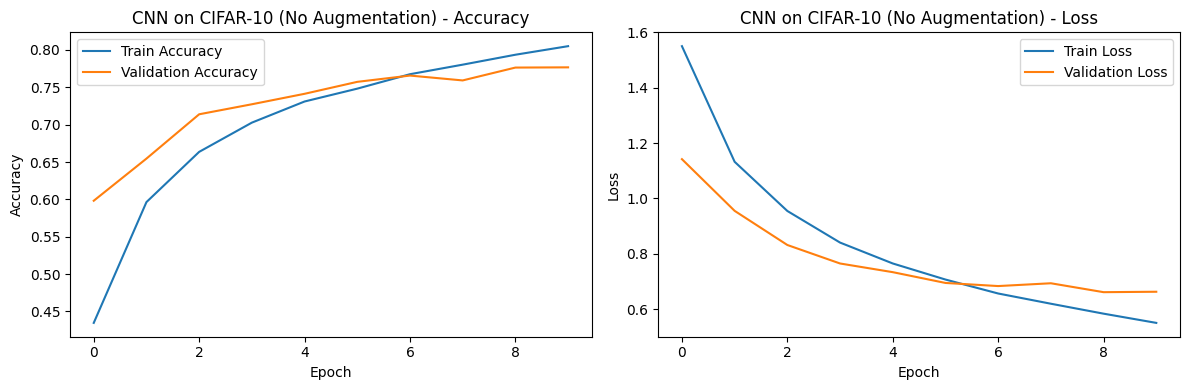

In [7]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function with your training history
plot_history(history_no_aug, "CNN on CIFAR-10 (No Augmentation)")


# Train CNN with Single-Image Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import clone_model

# Data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=15,         # Rotate images by ±15 degrees
    width_shift_range=0.1,     # Shift width by ±10%
    height_shift_range=0.1,    # Shift height by ±10%
    horizontal_flip=True       # Randomly flip images horizontally
)

datagen.fit(x_train)

# Clone the original model architecture (no need to re-define it manually)
aug_model = clone_model(model)
aug_model.build(input_shape=(None, 32, 32, 3))  # For safety
aug_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train with augmented data
history_aug = aug_model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    steps_per_epoch=len(x_train) // 64,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.3176 - loss: 1.8353 - val_accuracy: 0.5422 - val_loss: 1.2605
Epoch 2/10
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5000 - loss: 1.5336

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5000 - loss: 1.5336 - val_accuracy: 0.5411 - val_loss: 1.2578
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5201 - loss: 1.3367 - val_accuracy: 0.5864 - val_loss: 1.1871
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4844 - loss: 1.3864 - val_accuracy: 0.5870 - val_loss: 1.1806
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5857 - loss: 1.1743 - val_accuracy: 0.6605 - val_loss: 0.9648
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5312 - loss: 1.2372 - val_accuracy: 0.6595 - val_loss: 0.9685
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6148 - loss: 1.0934 - val_accuracy: 0.6910 - val_loss: 0.8804
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6406 - loss: 1.0006 - val_accuracy: 0.6871 - val_loss: 0.8927
Epoch 9/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6400 - loss: 1.0157 - val_accuracy: 0.698

# Plot Training & Validation Accuracy/Loss (With Data Augmentation Only)

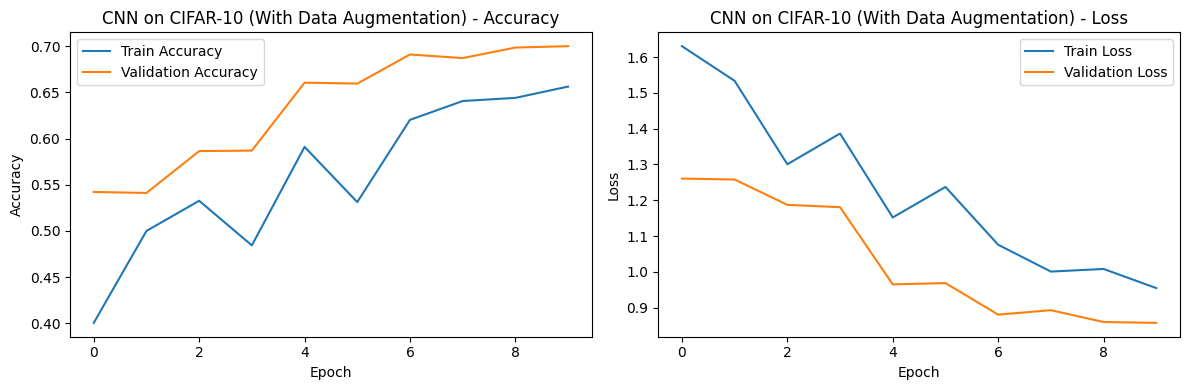

In [14]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the function for the augmented model
plot_history(history_aug, "CNN on CIFAR-10 (With Data Augmentation)")


# Compare Test Accuracies

In [15]:
# Evaluate both models
test_loss_no_aug, test_acc_no_aug = model.evaluate(x_test, y_test, verbose=0)
test_loss_aug, test_acc_aug = aug_model.evaluate(x_test, y_test, verbose=0)

print(f"Test Accuracy (No Augmentation): {test_acc_no_aug:.4f}")
print(f"Test Accuracy (With Augmentation): {test_acc_aug:.4f}")


Test Accuracy (No Augmentation): 0.7767
Test Accuracy (With Augmentation): 0.7000


# Compare Training Curves (Accuracy & Loss)

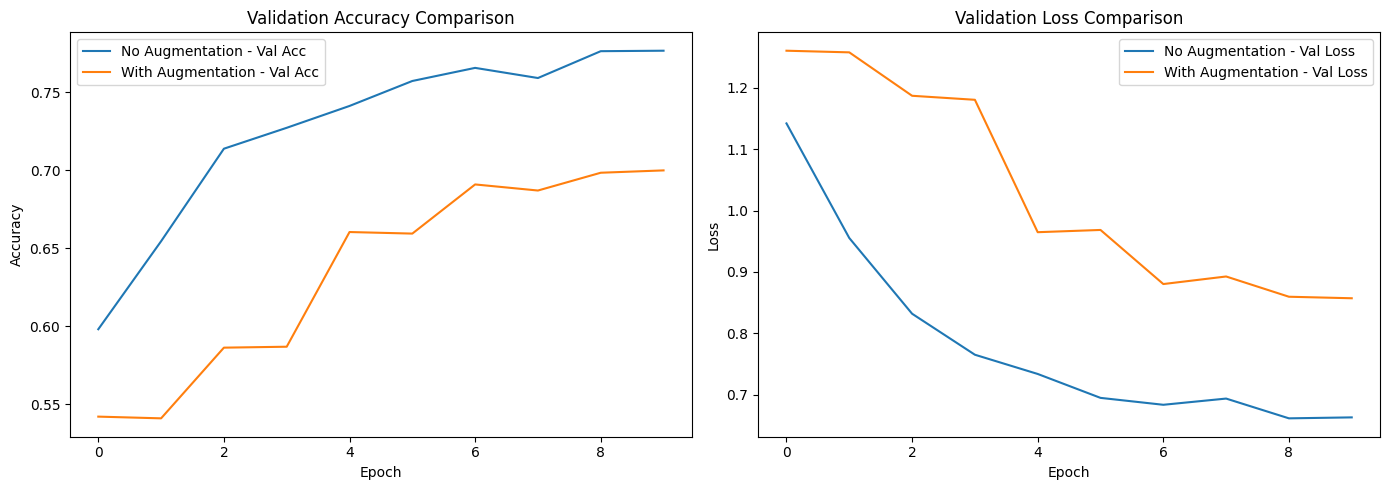

In [16]:
import matplotlib.pyplot as plt

def compare_histories(h1, h2, label1, label2):
    plt.figure(figsize=(14, 5))

    # 📈 Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(h1.history['val_accuracy'], label=label1 + ' - Val Acc')
    plt.plot(h2.history['val_accuracy'], label=label2 + ' - Val Acc')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # 📉 Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(h1.history['val_loss'], label=label1 + ' - Val Loss')
    plt.plot(h2.history['val_loss'], label=label2 + ' - Val Loss')
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot both models' histories
compare_histories(history_no_aug, history_aug, "No Augmentation", "With Augmentation")


# Plot Final Test Accuracy Bar Chart

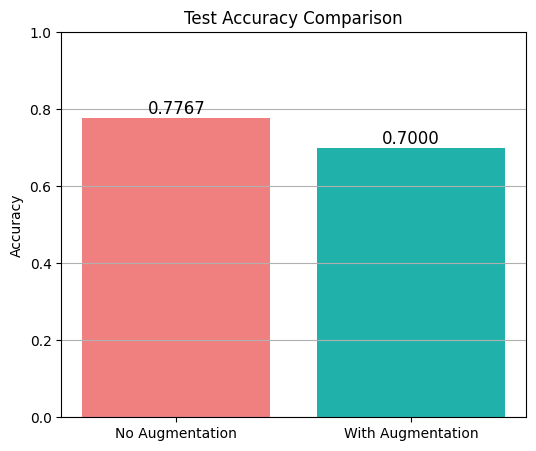

In [17]:
# Evaluate models (if not done already)
test_loss_no_aug, test_acc_no_aug = model.evaluate(x_test, y_test, verbose=0)
test_loss_aug, test_acc_aug = aug_model.evaluate(x_test, y_test, verbose=0)

# Plot bar chart
labels = ['No Augmentation', 'With Augmentation']
accuracies = [test_acc_no_aug, test_acc_aug]

plt.figure(figsize=(6, 5))
plt.bar(labels, accuracies, color=['lightcoral', 'lightseagreen'])
plt.ylim(0, 1)
plt.title("Test Accuracy Comparison")
plt.ylabel("Accuracy")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)
plt.grid(axis='y')
plt.show()
